# Visual documentation of EAMENA Heritage Places Concept values

Associate iconic images to HP EAMENA's concepts to illustrate the latters (ex: Threat type = Agricultural/Pastoral).
<br><br>
<center>

<img src = "https://raw.githubusercontent.com/eamena-project/eamena-arches-dev/main/www/arches-v7-hp-data-erd-img.png" width = "650">
</center>

The objective is :
* to document particular cases with visual documentation having EAMENA and EXIF metadata (Author, Subject, ..., EAMENA UUID, etc.).
* complete the interactive ERD by linking the UUID concept image to the RM.
* extend the finalization of reference data documentation.

## Libraries and paths

In [1]:
%cd /content/
!rm /content/eamena-data -R
!git clone https://github.com/eamena-project/eamena-data.git

!rm cultural-heritage -R
!git clone https://github.com/achp-project/cultural-heritage.git
!pip install  -q -r  cultural-heritage/graph-parser/requirements.txt
%cd /content/cultural-heritage/graph-parser/
import graph_mixer as gm
%cd /content/

!rm eamena-functions -R
!git clone https://github.com/eamena-project/eamena-functions.git
# %cd /content/eamena-functions/mds
# import mds
%cd /content/eamena-functions/
import mds
from mds import mds
import concepts
from concepts import concepts as cpt

# librairies
# for the images..
import os
import random
import pandas as pd
!pip install exif
from exif import Image as exImg
from IPython.display import Image as IpImg
from IPython.display import Markdown, display, HTML, clear_output
import ipywidgets as widgets
from ipywidgets import interact, interactive
# ..and for the graph
import urllib.request
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import re
from pyvis import network as net
import folium
import json
from google.colab import files

cases_path = "/content/eamena-data/reference-data/concepts/heritage_places/cases/"
cases_img_path = "https://raw.githubusercontent.com/eamena-project/eamena-data/main/reference-data/concepts/heritage_places/cases/img/" # cases_path + "img/"
# list
list_path = 'https://raw.githubusercontent.com/eamena-project/eamena-data/main/reference-data/concepts/heritage_places/cases/list.tsv'

/content
Cloning into 'eamena-data'...
remote: Enumerating objects: 260, done.
remote: Counting objects: 100% (260/260), done.
remote: Compressing objects: 100% (181/181), done.
remote: Total 260 (delta 71), reused 233 (delta 46), pack-reused 0
Receiving objects: 100% (260/260), 8.40 MiB | 13.65 MiB/s, done.
Resolving deltas: 100% (71/71), done.
Cloning into 'cultural-heritage'...
remote: Enumerating objects: 3290, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 3290 (delta 11), reused 7 (delta 3), pack-reused 3260
Receiving objects: 100% (3290/3290), 36.74 MiB | 12.88 MiB/s, done.
Resolving deltas: 100% (2397/2397), done.
/content/cultural-heritage/graph-parser
/content
Cloning into 'eamena-functions'...
remote: Enumerating objects: 292, done.
remote: Counting objects: 100% (82/82), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 292 (delta 41), reused 64 (delta 24), pack-reused 210
Receiving objec

## Photographs listing

Photos of iconic cases of threats types (agricole, vandalsim, etc.)

In [2]:
df_list = pd.read_csv(list_path, sep='\t')
df_list['image_path'] = cases_img_path + df_list['image']
df_list

,label,image,uuid,uuid_parent,image_path
0,Threat type - Agricultural/Pastoral,threattype-agricole.jpg,767e9467-3bc2-3f71-9427-0ace387bd843,34cfea7b-c2c0-11ea-9026-02e7594ce0a0,https://raw.githubusercontent.com/eamena-proje...
1,Threat type - Vandalism,threattype-vandalism-1.jpg,4e66f55d-0717-4d1f-89aa-949771ace643,34cfea7b-c2c0-11ea-9026-02e7594ce0a0,https://raw.githubusercontent.com/eamena-proje...
2,Threat type - Looting and Illegal Activities,threattype-looting.jpg,66457bbc-965b-36aa-8fff-de0a28b68f33,34cfea7b-c2c0-11ea-9026-02e7594ce0a0,https://raw.githubusercontent.com/eamena-proje...
3,Threat type - Building and Development,threattype-urbanism.jpg,8e602902-3c8a-3430-a7df-fff6df57db8b,34cfea7b-c2c0-11ea-9026-02e7594ce0a0,https://raw.githubusercontent.com/eamena-proje...
4,Threat type - Infrastructure and Transport,threattype-infrastructure.png,fc794768-48ba-329a-8795-db687d38a004,34cfea7b-c2c0-11ea-9026-02e7594ce0a0,https://raw.githubusercontent.com/eamena-proje...
5,Disturbance type - Mining and Quarrying,disturbtype-mining.png,0fa37af2-e19b-3f1c-90c5-b021dbf7f91c,34cfea79-c2c0-11ea-9026-02e7594ce0a0,https://raw.githubusercontent.com/eamena-proje...


## Photographs array

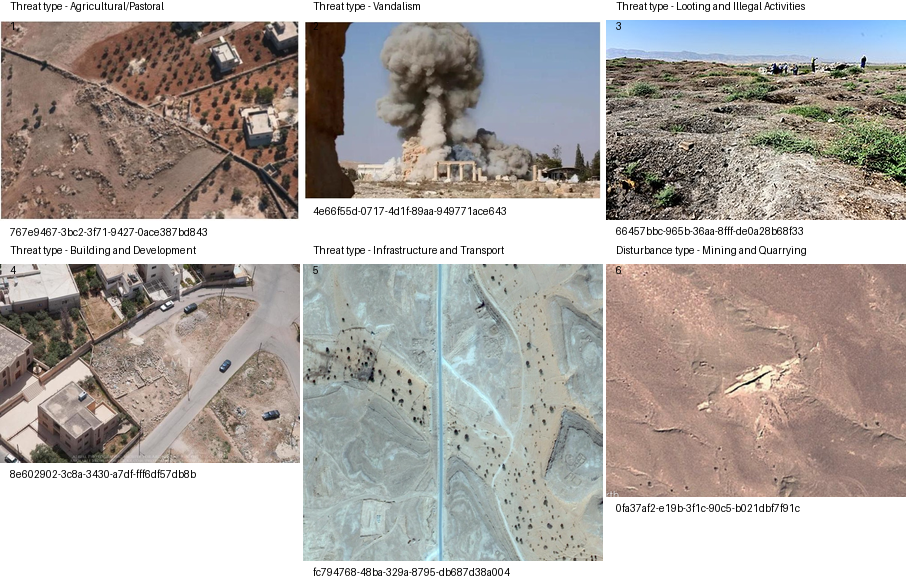

In [6]:
grid_img = cpt.img_grid(df_list)
grid_img

## Graph

Collect the subgraphs (i.e. components) of the RM

In [ ]:
my_rm = 'EAMENA'
%cd /content/cultural-heritage/graph-parser/
!rm inputResourceModels -R
!mkdir -p inputResourceModels
gm.rm_selected_one(my_rm, gm.rm_list())
!python /content/cultural-heritage/graph-parser/graph_comparator.py -d -m list -o subgraphMetrics.csv inputResourceModels/*.json
subgraph_metrics = pd.read_csv('subgraphMetrics.csv')

/content/cultural-heritage/graph-parser
rm: cannot remove 'inputResourceModels': No such file or directory
EAMENA_Heritage%20Place.json has been loaded into the folder inputResourceModels/


Create the RM graph and add the photos to it

In [ ]:
# OK
rm_project= 'EAMENA'
filename = rm_project + "-erd-concepts.html"
mds_template_df = mds.mds_template()
mds_template_df['Enhanced record minimum standard'] = mds_template_df['Enhanced record minimum standard'].str.contains(r'Yes', case = False, na = False, regex = True).astype(int)
mds_template_df = mds_template_df.loc[mds_template_df['Enhanced record minimum standard'] == 1]
in_erms = list(mds_template_df['uuid_sql'])
G = gm.create_rm_graph(rm_project= rm_project, color_fields = mds_template_df)
# create the graph of images
G1 = gm.create_img_graph(G = G, mass = 5, size = 30)
# merge with the RM graph
G_merged = nx.compose(G, G1)
hp_G = gm.plot_net_graph(G_merged, filename = filename, width = "1200px", height = "1000px")
HTML(filename = filename)

*read: 34cfea7b-c2c0-11ea-9026-02e7594ce0a0


In [ ]:
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Utilities

In [ ]:
# random image
my_range = range(1, len(df_list))
i = random.sample(my_range, 1)[0]
display(Markdown(f"**{df_list.loc[i, 'uuid']}**"))
display(IpImg(df_list.loc[i, 'image_path']))
display(Markdown(f"**{df_list.loc[i, 'label']}**"))